In [117]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('merged_data.csv')

ds.head()



,Zip code,Kitchen,type,subtype,price,bedrooms,Living area,Terrace,Garden,Garden area,landplot,facades,pool,condition,city,province
0,1000,1.0,apartment,flat studio,335000.0,0.0,58.0,0.0,0.0,0.0,NaN,2.0,NaN,just renovated,Brussel,Brussels Hoofdstedelijk Gewest
1,1000,1.0,apartment,penthouse,1400000.0,2.0,220.0,1.0,0.0,0.0,NaN,4.0,NaN,as new,Brussel,Brussels Hoofdstedelijk Gewest
2,1000,1.0,apartment,apartment,289000.0,2.0,80.0,1.0,0.0,0.0,NaN,2.0,NaN,good,Brussel,Brussels Hoofdstedelijk Gewest
3,1000,1.0,apartment,apartment,606000.0,3.0,220.0,0.0,0.0,0.0,NaN,3.0,NaN,to be done up,Brussel,Brussels Hoofdstedelijk Gewest
4,1000,1.0,house,house,580000.0,4.0,179.0,0.0,0.0,0.0,80.0,2.0,NaN,to be done up,Brussel,Brussels Hoofdstedelijk Gewest


[Text(0, 0, 'Brussels Hoofdstedelijk Gewest'),
 Text(1, 0, 'Brabant wallon'),
 Text(2, 0, 'Vlaams-Brabant'),
 Text(3, 0, 'Antwerpen'),
 Text(4, 0, 'Limburg'),
 Text(5, 0, 'Liège'),
 Text(6, 0, 'Namur'),
 Text(7, 0, 'Hainaut'),
 Text(8, 0, 'Luxembourg'),
 Text(9, 0, 'West-Vlaanderen'),
 Text(10, 0, 'Oost-Vlaanderen')]

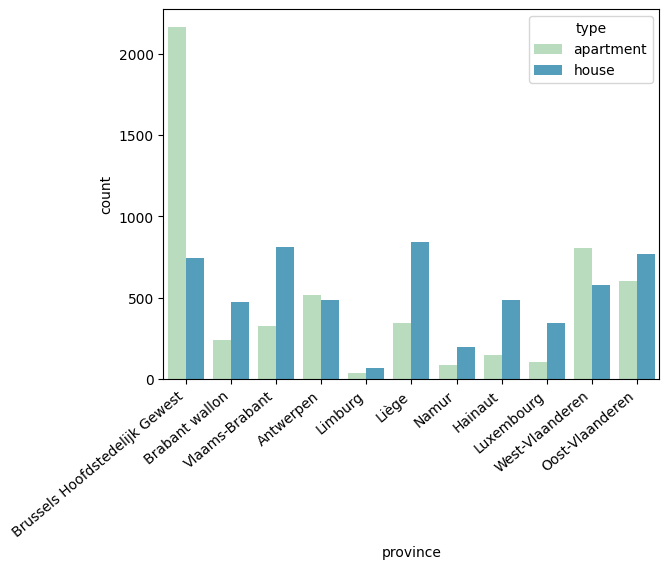

In [122]:
graph = sns.countplot(x='province', data=ds, hue='type', palette='GnBu')
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')

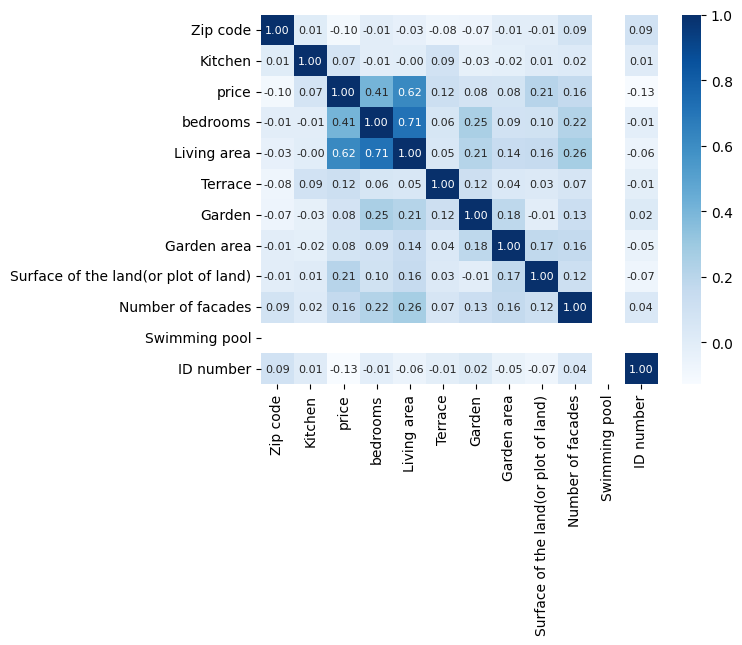

In [13]:

graph_mx = ds.corr(numeric_only=True)
graph = sns.heatmap(graph_mx, annot=True, annot_kws={"size": 8}, fmt='.2f', cmap='Blues')



(0.0, 2000000.0)

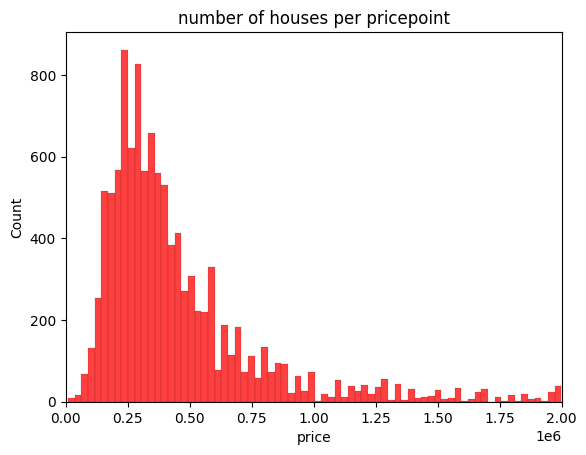

In [18]:
graph = sns.histplot(ds['price'], kde=False, color='red')
graph.set(title='number of houses per pricepoint')
graph.set_xlim(0, 2000000)

[Text(0, 0, 'castle'),
 Text(1, 0, 'manor house'),
 Text(2, 0, 'other property'),
 Text(3, 0, 'exceptional property'),
 Text(4, 0, 'mansion'),
 Text(5, 0, 'villa'),
 Text(6, 0, 'penthouse'),
 Text(7, 0, 'farmhouse'),
 Text(8, 0, 'triplex'),
 Text(9, 0, 'apartment block'),
 Text(10, 0, 'loft'),
 Text(11, 0, 'mixed use building'),
 Text(12, 0, 'country cottage'),
 Text(13, 0, 'town house'),
 Text(14, 0, 'bungalow'),
 Text(15, 0, 'duplex'),
 Text(16, 0, 'house'),
 Text(17, 0, 'ground floor'),
 Text(18, 0, 'apartment'),
 Text(19, 0, 'service flat'),
 Text(20, 0, 'flat studio'),
 Text(21, 0, 'kot'),
 Text(22, 0, 'chalet')]

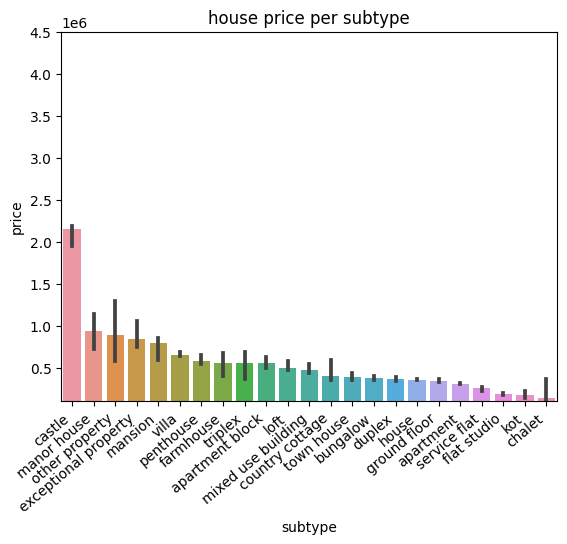

In [21]:
ds = pd.read_csv('main_property_data.csv')

ds.drop_duplicates(inplace=True)
ds.rename(columns={'Type of property': 'type'}, inplace=True)
ds.rename(columns={'Subtype of property': 'subtype'}, inplace=True)
ds.rename(columns={'Price of property in euro': 'price'}, inplace=True)
ds.rename(columns={'Number of bedrooms': 'bedrooms'}, inplace=True)
ds.drop('Raw num:', inplace=True, axis=1)
ds.drop('Locality', inplace=True, axis=1)
ds.sort_values('price', inplace=True, ascending=False)
test = ds.groupby("subtype")["price"].median().sort_values(ascending=False).index
graph = sns.barplot(x='subtype', y='price', data=ds, order=test, estimator='median')
graph.set(title='house price per subtype')
graph.set_ylim(100000, 4500000)
graph.set_xticklabels(graph.get_xticklabels(), rotation=40, ha='right')

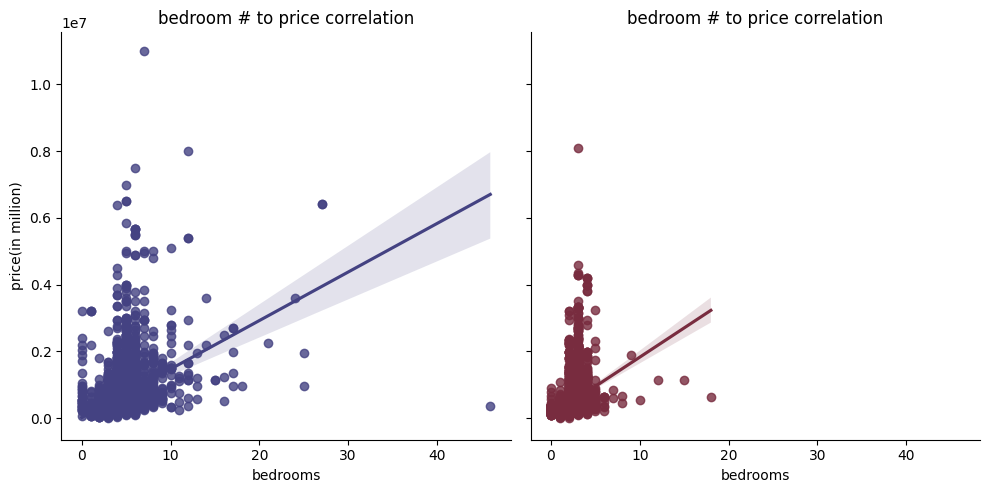

In [31]:
graph = sns.lmplot(x='bedrooms', y='price', data=ds, hue='type', palette='icefire', col='type')
graph.set(xlabel = 'bedrooms', ylabel = 'price(in million)', title= 'bedroom # to price correlation')

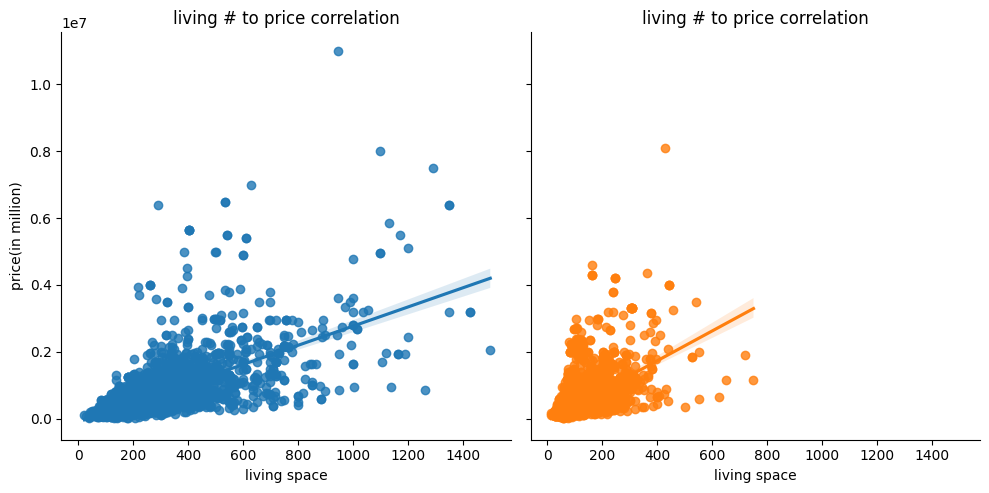

In [29]:
graph = sns.lmplot(x='Living area', y='price', data=ds, col='type', hue='type')
graph.set(xlabel = 'living space', ylabel = 'price(in million)', title= 'living # to price correlation')

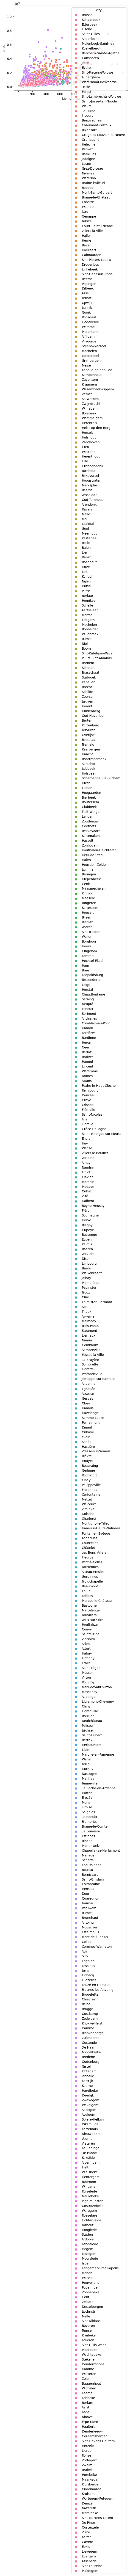

In [114]:
dss = pd.read_csv('merged_data.csv')
graph = sns.scatterplot(x='Living area', y='price', data=dss, hue='city')